# Olist E-Commerce Website Data Analysis 

Dataset link: https://www.kaggle.com/olistbr/brazilian-ecommerce

## Table of content:
### Setting up:
* Importing Libraries


* Loading the Datasets and Data Cleaning

### Visualization and Data Insights:



* Boxplot For The Product Weights and Freight Value (Univariable)


* General Exploration Histogram Over All Dataframe Features (Univariable)


* What Is The Most Frequent Payment Type ? (Univariable)


* Payment Value Distribution Per Customer (Univariable)


* Freight Value Vs. Product Weight Scatterplot (Bivariable)


* What Is The Most Frequent Customer State ? (Bivariable)


* What Is The Most In Demand Product Category ? (Bivariable)


* What I The Most Highly Rated Product Category ? (Bivariable)


* what Is The Nicest Customer State ? (Bivariable)


* Payment Vs. Freight value (Bivariable)


* Payment Value Vs. Months vs. Year (Multivariable)


* Correlogram of Olist Master Dataframe (Multivariable)



### Machine Learning Application

* Clustering Customers Based On Review Rating and Purchase Power (Unsupervised Learning)


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score, confusion_matrix
import datetime
import random


%matplotlib inline
sns.set()
pd.options.display.max_columns = None

### Loading the Data

#### customers_dataset

In [2]:
# no nulls
customers_dataset_df = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
customers_dataset_df_clean = customers_dataset_df.copy()

customers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### geolocation_dataset

In [3]:
# no nulls
geolocation_dataset_df = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')
geolocation_dataset_df_clean = geolocation_dataset_df.copy()

geolocation_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
geolocation_zip_code_prefix    1000163 non-null int64
geolocation_lat                1000163 non-null float64
geolocation_lng                1000163 non-null float64
geolocation_city               1000163 non-null object
geolocation_state              1000163 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


#### order_items

In [4]:
# no nulls

order_items_df = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
order_items_df_clean = order_items_df.copy()

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
order_id               112650 non-null object
order_item_id          112650 non-null int64
product_id             112650 non-null object
seller_id              112650 non-null object
shipping_limit_date    112650 non-null object
price                  112650 non-null float64
freight_value          112650 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### order_payments

In [5]:
# no nulls
order_payments_dataset_df = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')
order_payments_dataset_df_clean = order_payments_dataset_df.copy()

order_payments_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


#### order_reviews_dataset

In [6]:
# review_comment_title and review_comment_message fields are empty which is fine, we will not be using them in out analysis so
# we will drop the columns in addition to review_creation_date and review_answer_timestamp columns
order_reviews_dataset_df = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
order_reviews_dataset_df_clean = order_reviews_dataset_df.copy()

order_reviews_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null object
review_answer_timestamp    100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [7]:
order_reviews_dataset_df_clean.drop(columns = ['review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'], inplace = True)

In [8]:
order_reviews_dataset_df_clean.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [9]:
order_reviews_dataset_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
review_id       100000 non-null object
order_id        100000 non-null object
review_score    100000 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [10]:
order_reviews_dataset_df_clean.describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### orders_dataset

In [11]:
# 1.we will be assessing if our estimation on the order_estimated_delivery_date is correct most of the time or not, so in this casr
# we will create a df that has only the timestamps and dates and we will be dropping this nan values to do so, that is so we 
# do not loose data for other operations from the original dataframe.
# 2. we need to change  the data type of the dates to datetime.
orders_dataset_df = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
orders_dataset_df_clean = orders_dataset_df.copy()
orders_dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
orders_dataset_df_clean.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
# ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
order_datetime_list = ['order_purchase_timestamp', 'order_approved_at',\
                       'order_delivered_carrier_date', 'order_delivered_customer_date',\
                       'order_estimated_delivery_date']


orders_dataset_df_clean[order_datetime_list] = orders_dataset_df_clean[order_datetime_list].apply(pd.to_datetime, errors = 'coerce')
orders_dataset_df_clean.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [14]:
# testing
orders_dataset_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null datetime64[ns]
order_approved_at                99281 non-null datetime64[ns]
order_delivered_carrier_date     97658 non-null datetime64[ns]
order_delivered_customer_date    96476 non-null datetime64[ns]
order_estimated_delivery_date    99441 non-null datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [15]:
# checking valid values for order_status
orders_dataset_df_clean.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [16]:
# checking if for the delivered items we have the all the timings, the invoiced only can have nan values it is fine for the dates variables.
# we can see that we still have missing dates for already delivered orders, we can investigate closely in the company to see why we are missing these dates.

orders_dataset_df_clean.query("order_status in 'delivered'").isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [17]:
# getting the indexes of the columns that have a delivered order_status and a null order_approved_at because it does not make sense
delivered_and_not_approved_indexes = orders_dataset_df_clean[orders_dataset_df_clean['order_approved_at'].isnull()].query("order_status in 'delivered'").index

In [18]:
orders_dataset_df_clean.drop(inplace = True, index = delivered_and_not_approved_indexes)

In [19]:
orders_dataset_df_clean.query("order_status in 'delivered'").isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     2
order_delivered_customer_date    8
order_estimated_delivery_date    0
dtype: int64

#### products_dataset

In [20]:
products_dataset_df = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
products_dataset_df_clean = products_dataset_df.copy()

products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32341 non-null float64
product_description_lenght    32341 non-null float64
product_photos_qty            32341 non-null float64
product_weight_g              32949 non-null float64
product_length_cm             32949 non-null float64
product_height_cm             32949 non-null float64
product_width_cm              32949 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [21]:
# we will be dropping the rows that have missing product_category_name, product_name_lenght, product_description_lenght, product_photos_qty
# which are 610 rows of 32951
products_dataset_df_clean[products_dataset_df_clean['product_category_name'].isnull()].shape
null_products_indexes = products_dataset_df_clean[products_dataset_df_clean['product_category_name'].isnull()].index
products_dataset_df_clean.drop(inplace = True, index = null_products_indexes)

In [22]:
# testing
print(products_dataset_df_clean.shape[0],products_dataset_df.shape[0])

32341 32951


In [23]:
# 1 row missing dimensions, we will drop it also since it has negligible effect on our analysis
products_dataset_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32341 non-null object
product_category_name         32341 non-null object
product_name_lenght           32341 non-null float64
product_description_lenght    32341 non-null float64
product_photos_qty            32341 non-null float64
product_weight_g              32340 non-null float64
product_length_cm             32340 non-null float64
product_height_cm             32340 non-null float64
product_width_cm              32340 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [24]:
additional_products_missing_g_indexes = products_dataset_df_clean[products_dataset_df_clean['product_weight_g'].isnull()].index

In [25]:
products_dataset_df_clean.drop(inplace = True, index = additional_products_missing_g_indexes)

In [26]:
products_dataset_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32340 non-null object
product_category_name         32340 non-null object
product_name_lenght           32340 non-null float64
product_description_lenght    32340 non-null float64
product_photos_qty            32340 non-null float64
product_weight_g              32340 non-null float64
product_length_cm             32340 non-null float64
product_height_cm             32340 non-null float64
product_width_cm              32340 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [27]:
products_dataset_df_clean.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### sellers_dataset

In [28]:
# no missing values
sellers_dataset_df = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')
sellers_dataset_df_clean = sellers_dataset_df.copy()

sellers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
seller_id                 3095 non-null object
seller_zip_code_prefix    3095 non-null int64
seller_city               3095 non-null object
seller_state              3095 non-null object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


#### product_category_name_translation

In [29]:
product_category_name_translation_df = pd.read_csv('/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
product_category_name            71 non-null object
product_category_name_english    71 non-null object
dtypes: object(2)
memory usage: 1.2+ KB


In [30]:
# creating a master dataframe, that has all the clean dataframes to get more insights when we want to visualize, model and predict
master_df = orders_dataset_df_clean.copy()

master_df = master_df.merge(customers_dataset_df_clean, on='customer_id', indicator=True)

In [31]:
master_df = master_df.merge(order_reviews_dataset_df_clean, on='order_id')

In [32]:
master_df = master_df.merge(order_payments_dataset_df_clean, on='order_id')

In [33]:
master_df = master_df.merge(order_items_df_clean, on = 'order_id')

In [34]:
master_df = master_df.merge(products_dataset_df_clean, on = 'product_id')

In [35]:
master_df = master_df.merge(sellers_dataset_df_clean, on = 'seller_id')

In [36]:
master_df.shape

(116591, 36)

# Exploratory Data Visualization

#### In this section we will be answering inquiries using visualizations of data insights using univariable, bivariable and multivariable plots

In [37]:
master_df.shape

(116591, 36)

In [38]:
# we only have two columns having null values, order_delivered_carrier_date and order_delivered_customer_date  
master_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1215
order_delivered_customer_date    2517
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
_merge                              0
review_id                           0
review_score                        0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name

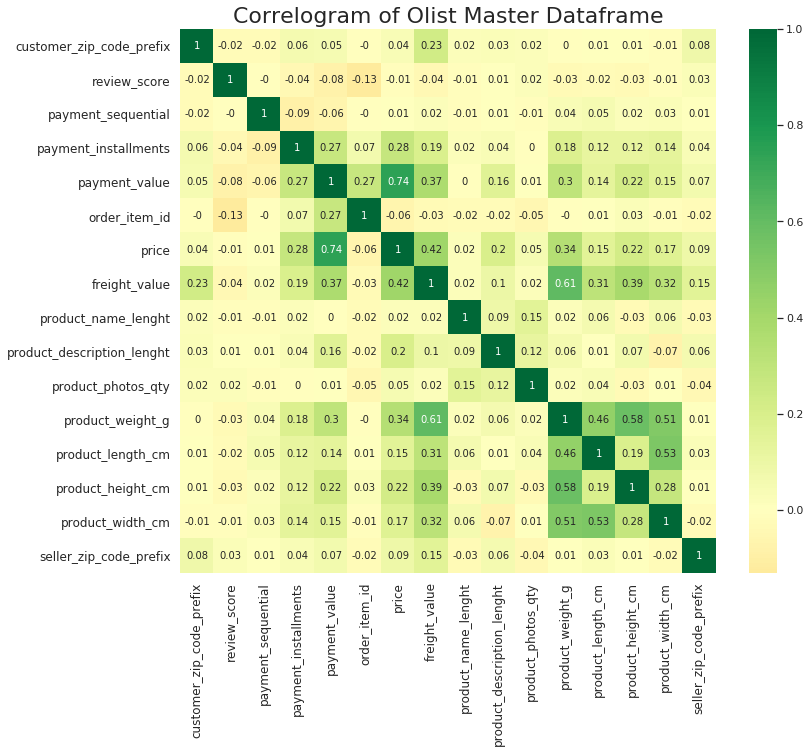

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(master_df.corr().round(2), xticklabels=master_df.corr().columns, yticklabels=master_df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of Olist Master Dataframe', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [40]:
master_df.corr().round(2)> 0.5

,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
customer_zip_code_prefix,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
review_score,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
payment_sequential,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
payment_installments,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
payment_value,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
order_item_id,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
price,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
freight_value,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
product_name_lenght,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
product_description_lenght,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [41]:
abs(master_df.corr().round(2))>0.5

,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
customer_zip_code_prefix,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
review_score,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
payment_sequential,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
payment_installments,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
payment_value,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
order_item_id,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
price,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
freight_value,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
product_name_lenght,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
product_description_lenght,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


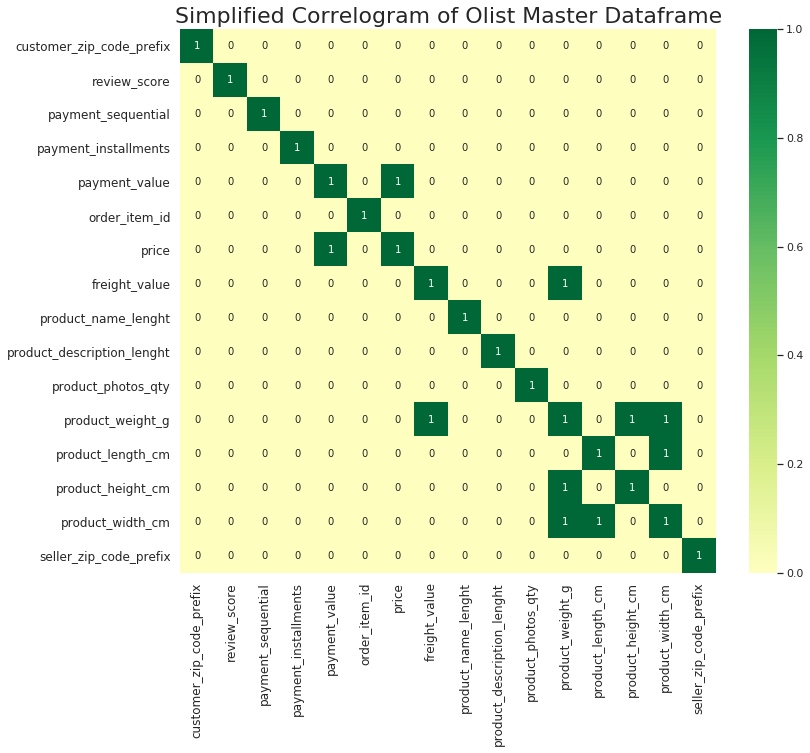

In [42]:
# we can see some correlation between our variables, we will use > 0.5 correlation to get a clearer view in our exploration

plt.figure(figsize=(12,10))
sns.heatmap(abs(master_df.corr().round(2))>0.5 , xticklabels=master_df.corr().columns, yticklabels=master_df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Simplified Correlogram of Olist Master Dataframe', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [43]:
list_of_correlated_columns = []

for i in (abs(master_df.corr().round(2))>0.5).columns:
    for j in (abs(master_df.corr().round(2))>0.5).columns:
        if ((abs(master_df.corr().round(2))>0.5).loc[i,j] == True):
            list_of_correlated_columns.append((i,j))

In [44]:
type(list_of_correlated_columns[0][0])

str

In [45]:
# gettng rid of the pairs constructed of the same variables
list_of_correlated_columns_not_same = []

for k in range(len(list_of_correlated_columns)):
    if list_of_correlated_columns[k][0] != list_of_correlated_columns[k][1]:
        list_of_correlated_columns_not_same.append((list_of_correlated_columns[k][0], list_of_correlated_columns[k][1]))


In [46]:
list_of_correlated_columns_not_same

[('payment_value', 'price'),
 ('price', 'payment_value'),
 ('freight_value', 'product_weight_g'),
 ('product_weight_g', 'freight_value'),
 ('product_weight_g', 'product_height_cm'),
 ('product_weight_g', 'product_width_cm'),
 ('product_length_cm', 'product_width_cm'),
 ('product_height_cm', 'product_weight_g'),
 ('product_width_cm', 'product_weight_g'),
 ('product_width_cm', 'product_length_cm')]

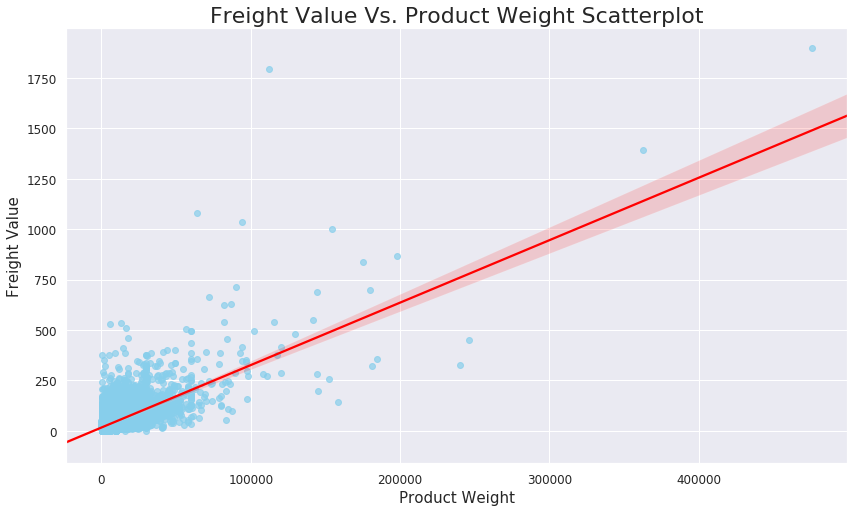

In [47]:
# since we have see correlation between the product_weight_g and freight_value in the heatmap we will be drawing
# scatter plot with a regression line.

plt.figure(figsize=(14,8))

product_weight_g_reg = master_df.groupby('customer_id').sum()[['product_weight_g','freight_value']].reset_index()['product_weight_g']
freight_value_reg = master_df.groupby('customer_id').sum()[['product_weight_g','freight_value']].reset_index()['freight_value']
sns.regplot(x=product_weight_g_reg, y=freight_value_reg, scatter_kws={'alpha':0.7, 'color':'skyblue'},\
           line_kws={'color':'red'});

plt.title('Freight Value Vs. Product Weight Scatterplot'.title(), fontsize=22)
plt.xlabel('Product Weight'.title(), fontsize=15)
plt.ylabel('Freight Value'.title(), fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

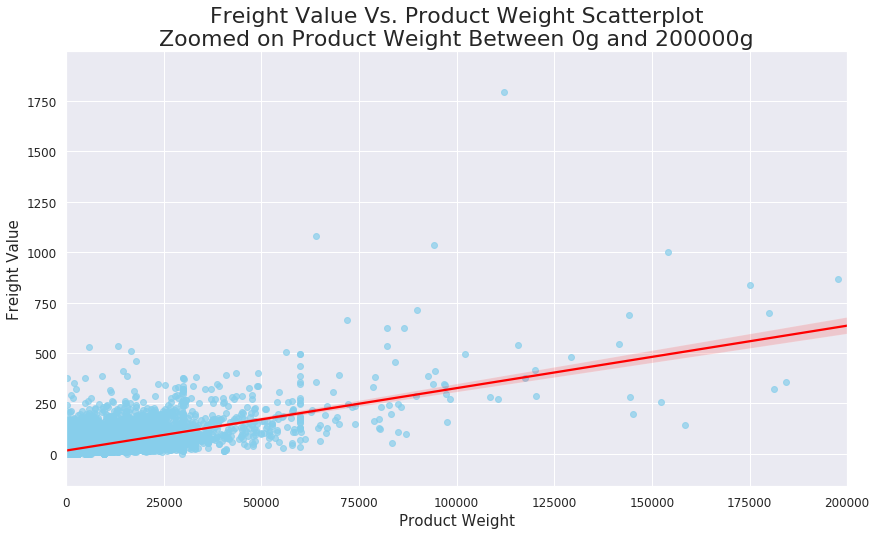

In [48]:
plt.figure(figsize=(14,8))

product_weight_g_reg = master_df.groupby('customer_id').sum()[['product_weight_g','freight_value']].reset_index()['product_weight_g']
freight_value_reg = master_df.groupby('customer_id').sum()[['product_weight_g','freight_value']].reset_index()['freight_value']
sns.regplot(x=product_weight_g_reg, y=freight_value_reg, scatter_kws={'alpha':0.7, 'color':'skyblue'},\
           line_kws={'color':'red'});

plt.xlim(0, 200000)

plt.title('Freight Value Vs. Product Weight Scatterplot'+'\n'+'Zoomed on Product Weight Between 0g and 200000g', fontsize=22)
plt.xlabel('Product Weight'.title(), fontsize=15)
plt.ylabel('Freight Value'.title(), fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


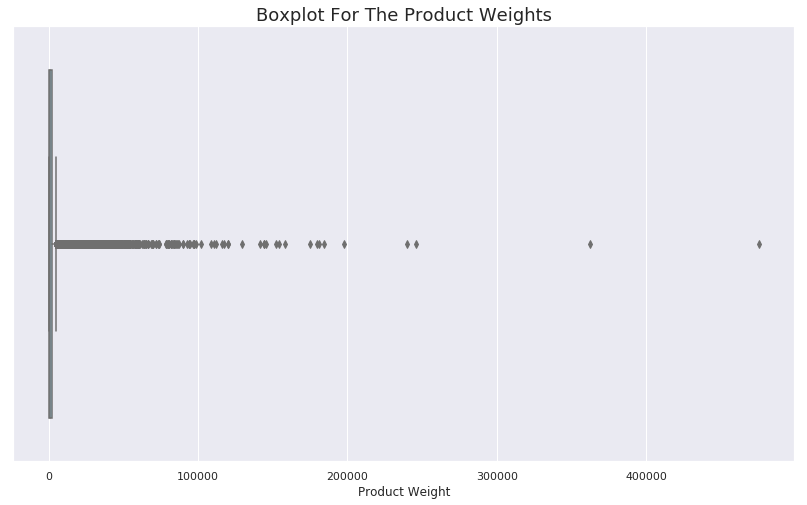

In [49]:
# alot of outliers for the product weight
plt.figure(figsize=(14,8))
sns.boxplot(x=product_weight_g_reg, color='skyblue');

plt.title('Boxplot For The Product Weights', fontsize=18);
plt.xlabel('Product Weight'.title(), fontsize=12);

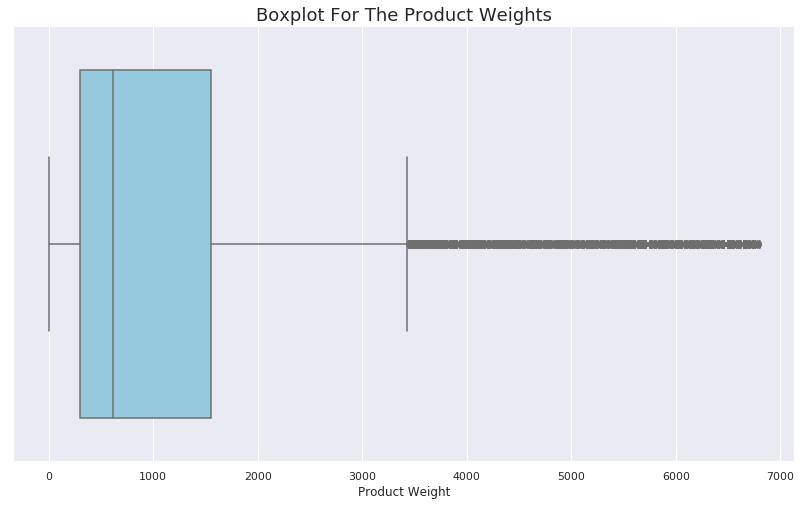

In [50]:
#taking up to the 90% quantile
plt.figure(figsize=(14,8))

sns.boxplot(x=product_weight_g_reg[product_weight_g_reg < product_weight_g_reg.quantile(0.90)], color='skyblue');
plt.title('Boxplot For The Product Weights', fontsize=18);
plt.xlabel('Product Weight'.title(), fontsize=12);

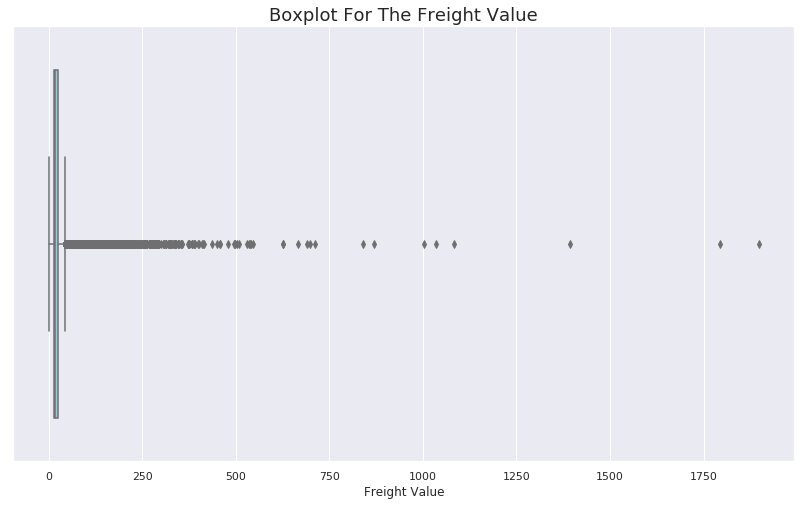

In [51]:
# altot of outliers in the freight value, we will be taking the 90% quantile
plt.figure(figsize=(14,8))

sns.boxplot(freight_value_reg, color='skyblue');

plt.title('Boxplot For The Freight Value', fontsize=18);
plt.xlabel('Freight Value'.title(), fontsize=12);

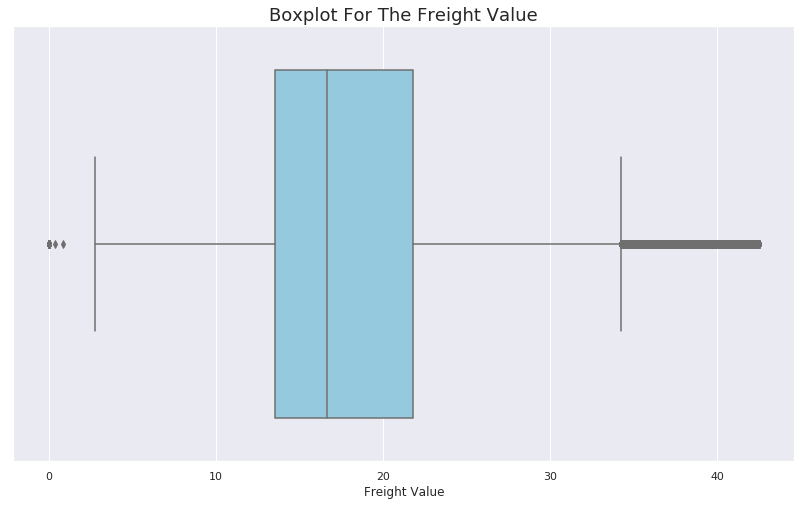

In [52]:
#taking up to the 90% quantile
plt.figure(figsize=(14,8))

sns.boxplot(freight_value_reg[freight_value_reg < freight_value_reg.quantile(0.90)], color='skyblue');

plt.title('Boxplot For The Freight Value', fontsize=18);
plt.xlabel('Freight Value'.title(), fontsize=12);

In [53]:
weight_freight_reg = pd.DataFrame({'product_weights':product_weight_g_reg, 'freight_value':freight_value_reg})

In [54]:
weight_freight_reg.iloc[:,1].head()

0    24.94
1    12.51
2    15.43
3    29.45
4    14.01
Name: freight_value, dtype: float64

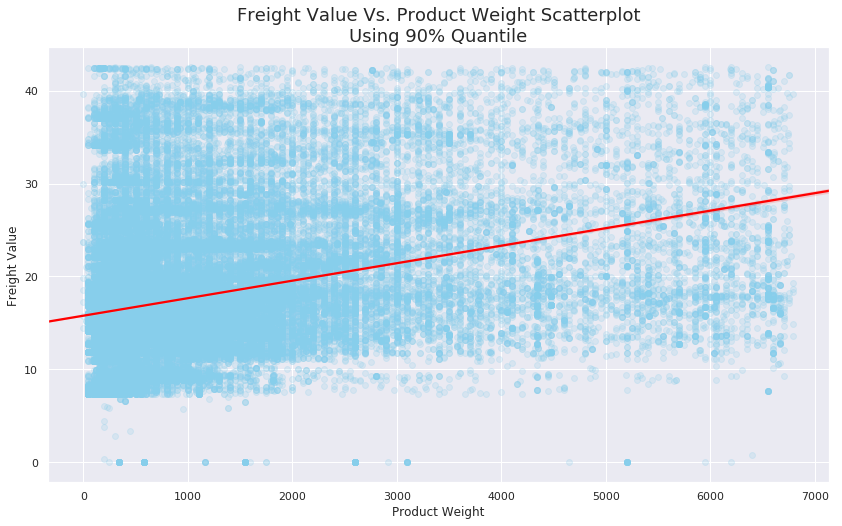

In [55]:
# ploting the regresion line with the 90% quantile, we can still see that a linear regression does not fit it well
plt.figure(figsize=(14,8))

quantile_weight_freight_reg = weight_freight_reg[weight_freight_reg < weight_freight_reg.quantile(0.9)]

sns.regplot(quantile_weight_freight_reg['product_weights'] ,quantile_weight_freight_reg['freight_value'],\
            scatter_kws={'alpha':0.2, 'color':'skyblue'},\
            line_kws={'color':'red'});

plt.title('Freight Value Vs. Product Weight Scatterplot'+'\n'+'Using 90% Quantile' , fontsize=18);
plt.ylabel('Freight Value'.title(), fontsize=12);
plt.xlabel('Product Weight'.title(), fontsize=12);

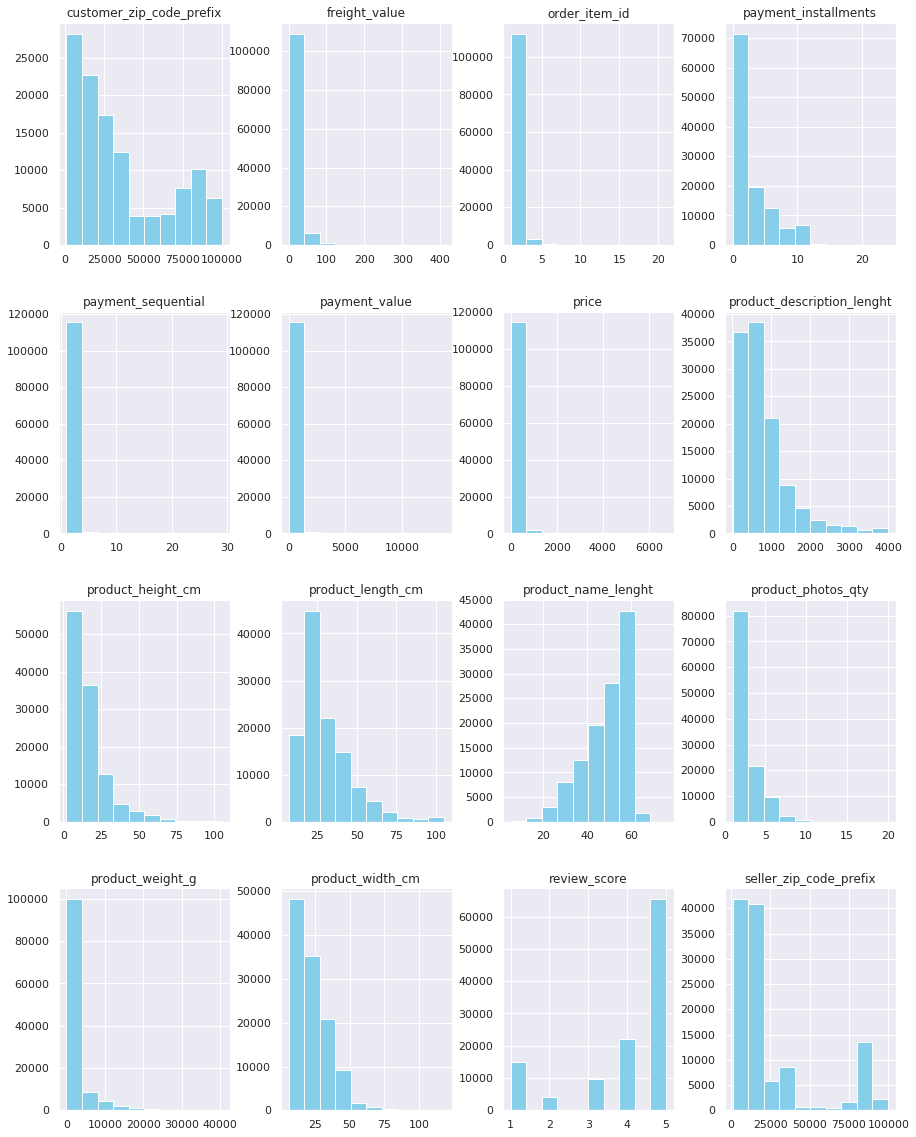

In [56]:
# general exploration
master_df.hist(figsize=(15,20), color='skyblue');

## Univariable Plots

* Type of payments distribution 
* Orders prices distribution 
* Count plot for states 
* Count plot for products category

In [57]:
# checking the payment types
master_df.payment_type.unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card'], dtype=object)

In [58]:
payment_type_count_plot_df = master_df[['payment_type','customer_id']].groupby(['customer_id', 'payment_type']).count().reset_index()

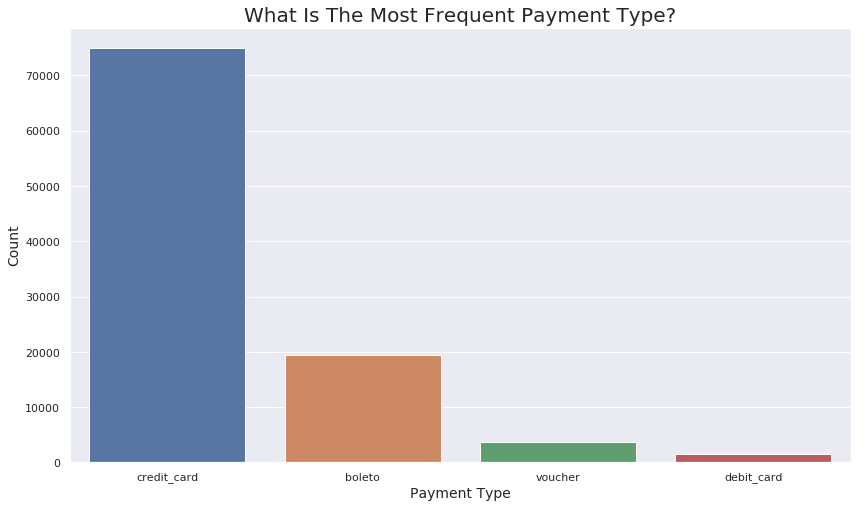

In [59]:
# The customers seems to prefer to pay by credit card over other options

plt.figure(figsize=(14,8))

sns.countplot(payment_type_count_plot_df['payment_type']);

plt.title('What is the most frequent payment type?'.title() , fontsize=20);
plt.ylabel('count'.title(), fontsize=14);
plt.xlabel('payment type'.title(), fontsize=14);

In [60]:
master_df.groupby('customer_id').sum().reset_index()['payment_value'].describe()

count     97262.000000
mean        207.281196
std         625.806982
min           9.590000
25%          63.000000
50%         110.025000
75%         197.190000
max      109312.640000
Name: payment_value, dtype: float64

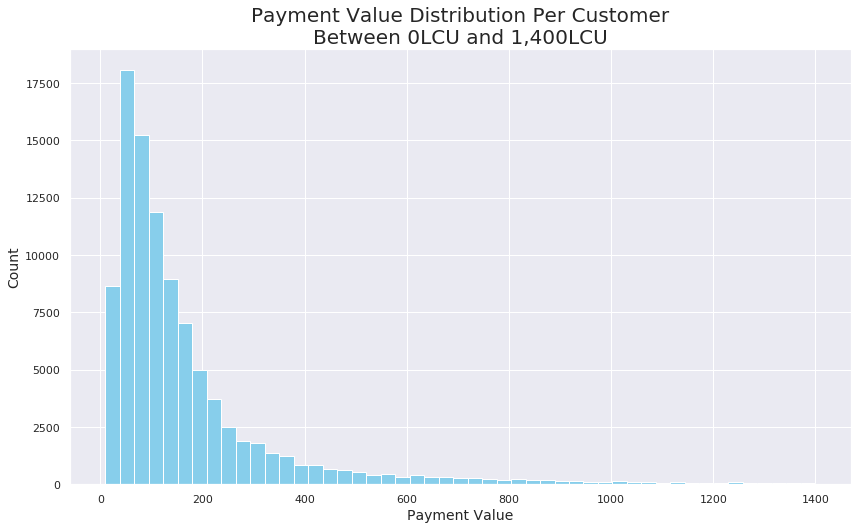

In [61]:
#### the price distribution of the invoices in right skewed as we see below, if we want to display the maximum values we will end up with no insights on the graph.

plt.figure(figsize=(14,8))

min_order_payment_value = min(master_df.groupby('customer_id').sum().reset_index()['payment_value'])
max_order_payment_value = max(master_df.groupby('customer_id').sum().reset_index()['payment_value'])

bins= np.linspace(start=min_order_payment_value, stop=1400, num=50)
plt.hist(x=np.asarray(master_df.groupby('customer_id').sum().reset_index()['payment_value']), bins=bins,\
         color='skyblue');

plt.title('payment value distribution per customer'.title()+'\n'+'Between 0LCU and 1,400LCU' , fontsize=20);
plt.ylabel('count'.title(), fontsize=14, rotation=90);
plt.xlabel('payment value'.title(), fontsize=14);


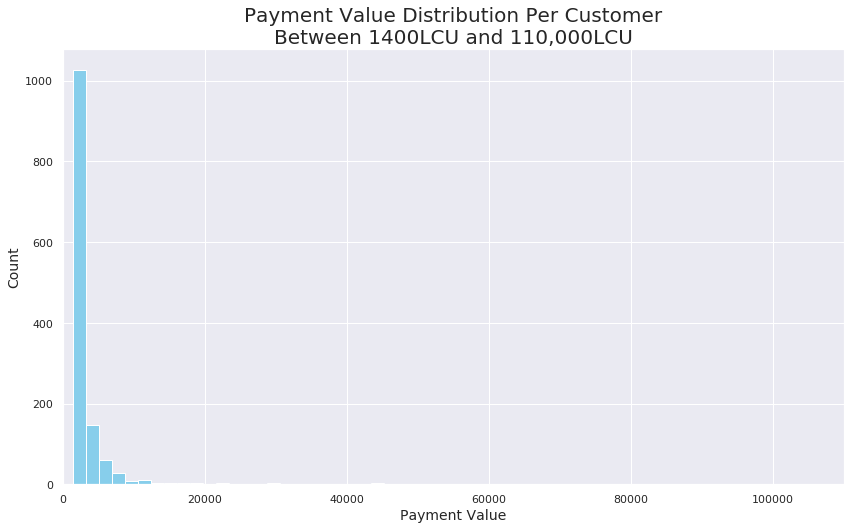

In [62]:
# the price distribution of the invoices in right skewed as we see below, if we want to display the maximum values we will end up with no insights on the graph.

plt.figure(figsize=(14,8))

bins= np.linspace(start=1400, stop=max_order_payment_value, num=60)
plt.hist(x=np.asarray(master_df.groupby('customer_id').sum().reset_index()['payment_value']), bins=bins,\
         color='skyblue');

plt.xlim(0,110000);
plt.title('payment value distribution per customer'.title()+'\n'+'Between 1400LCU and 110,000LCU' , fontsize=20);
plt.ylabel('count'.title(), fontsize=14);
plt.xlabel('payment value'.title(), fontsize=14);


In [63]:
customer_state_count_df = master_df.groupby(['customer_id','customer_state']).count().reset_index()

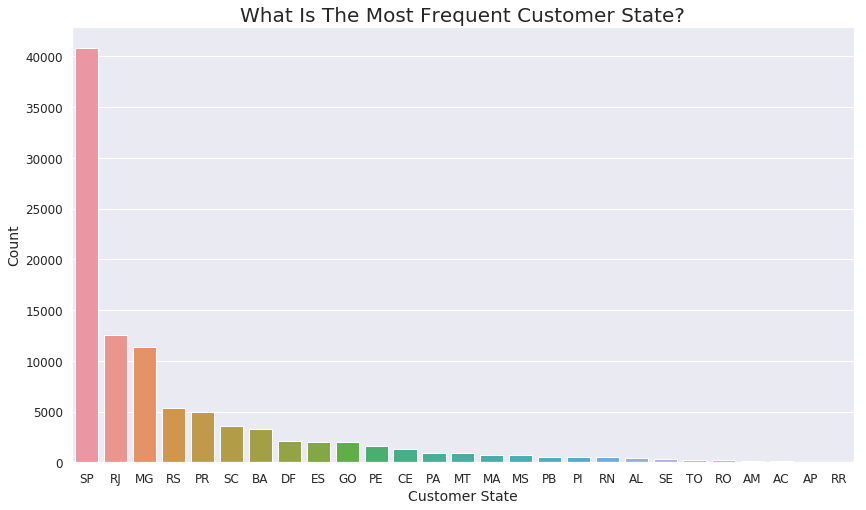

In [64]:
plt.figure(figsize=(14,8))
sns.countplot(customer_state_count_df.customer_state, order=customers_dataset_df.customer_state.value_counts().index);

plt.title('What is the most frequent customer state?'.title(), fontsize=20);
plt.ylabel('count'.title(), fontsize=14);
plt.xlabel('customer state'.title(), fontsize=14);

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [65]:
# adding the translated product name category to the data_frame to use it in the following plots.
master_df_with_product_categories = master_df.merge(product_category_name_translation_df, how='left', on='product_category_name');

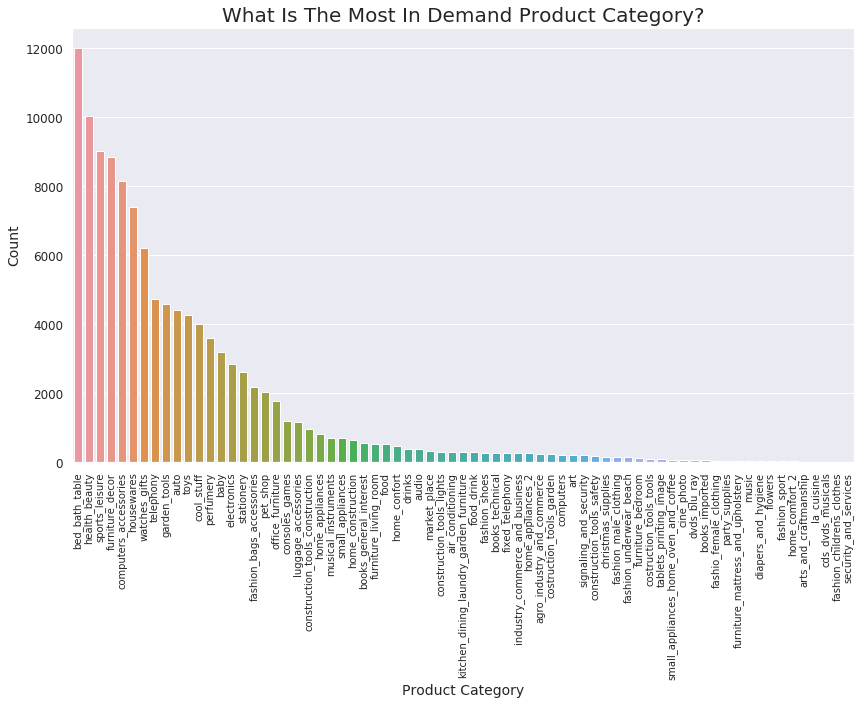

In [66]:
plt.figure(figsize=(14,8))

sns.countplot(master_df_with_product_categories.product_category_name_english,#
              order=master_df_with_product_categories.product_category_name_english.value_counts().index)

plt.title('What is the most in demand product category?'.title(), fontsize=20);
plt.ylabel('count'.title(), fontsize=14);
plt.xlabel('product category'.title(), fontsize=14);

plt.xticks(rotation=90, fontsize=10);
plt.yticks(fontsize=12)
plt.show()

## Bivariable plots

* Mean score vs products category (Bar plot)
* Mean score vs city (Bar plot)
* Order Price vs Freight Price (Scatter plot)

In [67]:
mean_score_vs_cat_df = master_df_with_product_categories.groupby(['product_category_name_english']).mean()['review_score'].reset_index()

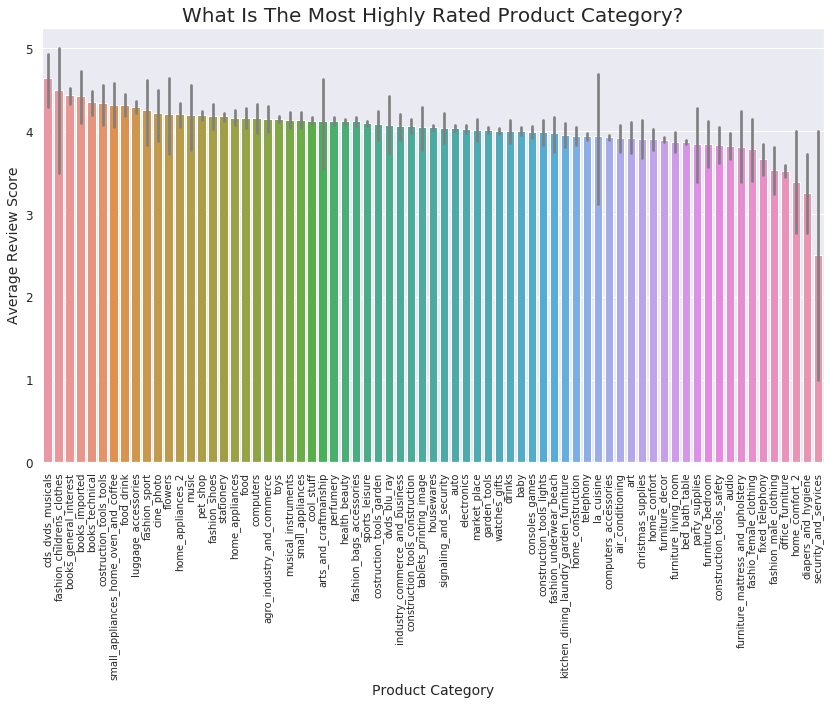

In [68]:
# The on average the best product category rating wise is that of cds_dvds_musicals, and the securit_and_services seems to have
# the lowest rating.

plt.figure(figsize=(14,8))

sns.barplot(data = master_df_with_product_categories, x='product_category_name_english', y='review_score',\
           order = master_df_with_product_categories.groupby('product_category_name_english').mean()\
            .reset_index().sort_values('review_score', ascending=False)['product_category_name_english'].values,
           errcolor = 'grey');

plt.title('what is the most highly rated product category?'.title(), fontsize=20);
plt.ylabel('Average Review Score'.title(), fontsize=14);
plt.xlabel('Product Category'.title(), fontsize=14);

plt.xticks(rotation=90, fontsize= 10);
plt.yticks(fontsize=12)
plt.show()

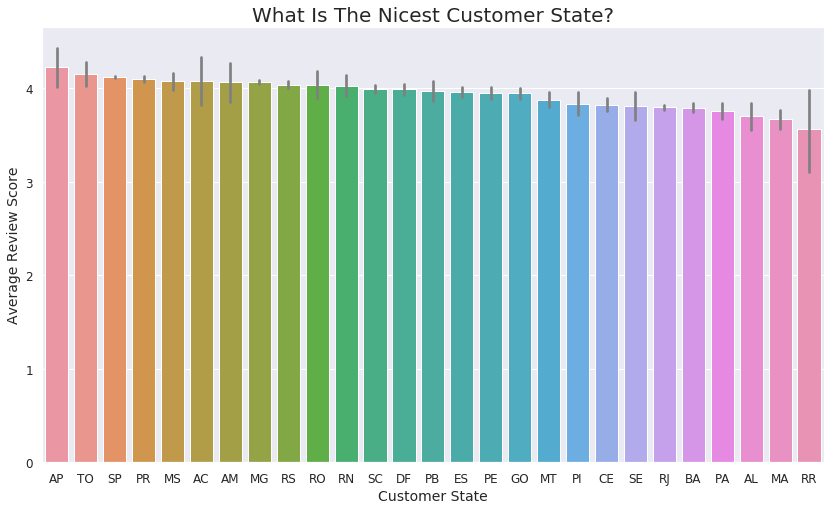

In [69]:
# The nicest state ? AP: macapa laranjal do jari

plt.figure(figsize=(14,8))

sns.barplot(data = master_df_with_product_categories, x='customer_state', y='review_score',\
           order = master_df_with_product_categories.groupby('customer_state').mean()\
            .reset_index().sort_values('review_score', ascending=False)['customer_state'].values,
           errcolor = 'grey');


plt.title('what is the nicest customer state?'.title(), fontsize=20);
plt.ylabel('Average Review Score'.title(), fontsize=14);
plt.xlabel('customer state'.title(), fontsize=14);

plt.xticks(rotation=0, fontsize= 12);
plt.yticks(fontsize=12)
plt.show()

In [70]:
# is there any relationship between the price of the order and the price of the freight? no

payment_vs_freight_df = master_df_with_product_categories.groupby('customer_id').sum().reset_index()[['payment_value','freight_value']]


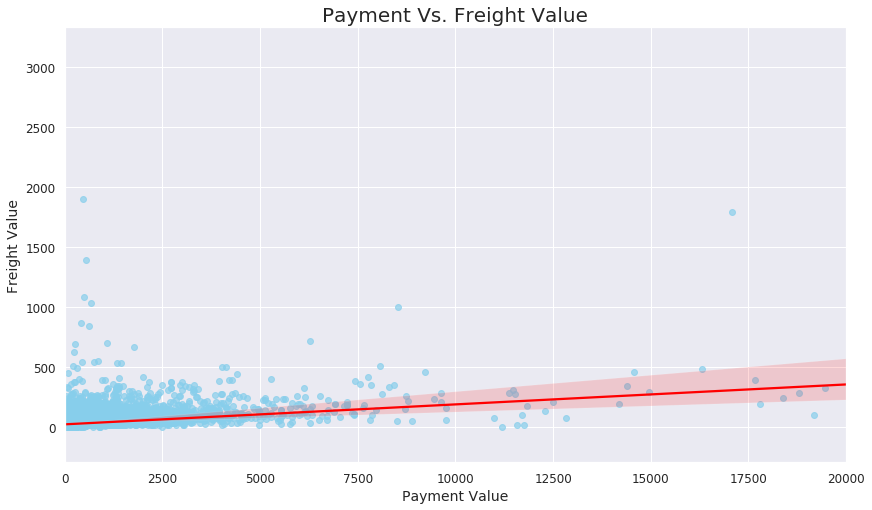

In [71]:
plt.figure(figsize=(14,8))
sns.regplot(data=payment_vs_freight_df, x=payment_vs_freight_df.payment_value, y=payment_vs_freight_df.freight_value,
            scatter_kws={'alpha':0.7, 'color':'skyblue'}, line_kws={'color':'red'});
plt.xlim(0,20000);

plt.title('Payment Vs. Freight value'.title(), fontsize=20);
plt.ylabel('Freight value'.title(), fontsize=14);
plt.xlabel('Payment Value'.title(), fontsize=14);

plt.xticks(rotation=0, fontsize= 12);
plt.yticks(fontsize=12)
plt.show()

## Multivariable Plots
* Payment value vs. month vs. year

In [72]:
master_df_with_product_categories['year'] = pd.DatetimeIndex(master_df_with_product_categories['order_purchase_timestamp']).year

In [73]:
master_df_with_product_categories['month'] = pd.DatetimeIndex(master_df_with_product_categories['order_purchase_timestamp']).month 

In [74]:
master_df_with_product_categories.groupby(['year','month']).sum()['payment_value']

year  month
2016  9            347.52
      10         74677.62
      12            19.62
2017  1         185448.60
      2         333422.10
      3         520516.26
      4         494963.13
      5         716657.39
      6         597028.31
      7         736779.41
      8         870094.62
      9        1012532.44
      10       1006491.01
      11       1576858.43
      12       1026263.80
2018  1        1384836.09
      2        1304051.61
      3        1458087.36
      4        1488789.62
      5        1502407.34
      6        1295648.39
      7        1348025.26
      8        1226471.32
      9            166.46
Name: payment_value, dtype: float64

In [75]:
multivariable_plot_df = master_df_with_product_categories.groupby(['year','month']).sum()['payment_value'].reset_index()
multivariable_plot_df


,year,month,payment_value
0,2016,9,347.52
1,2016,10,74677.62
2,2016,12,19.62
3,2017,1,185448.60
4,2017,2,333422.10
5,2017,3,520516.26
6,2017,4,494963.13
7,2017,5,716657.39
8,2017,6,597028.31
9,2017,7,736779.41


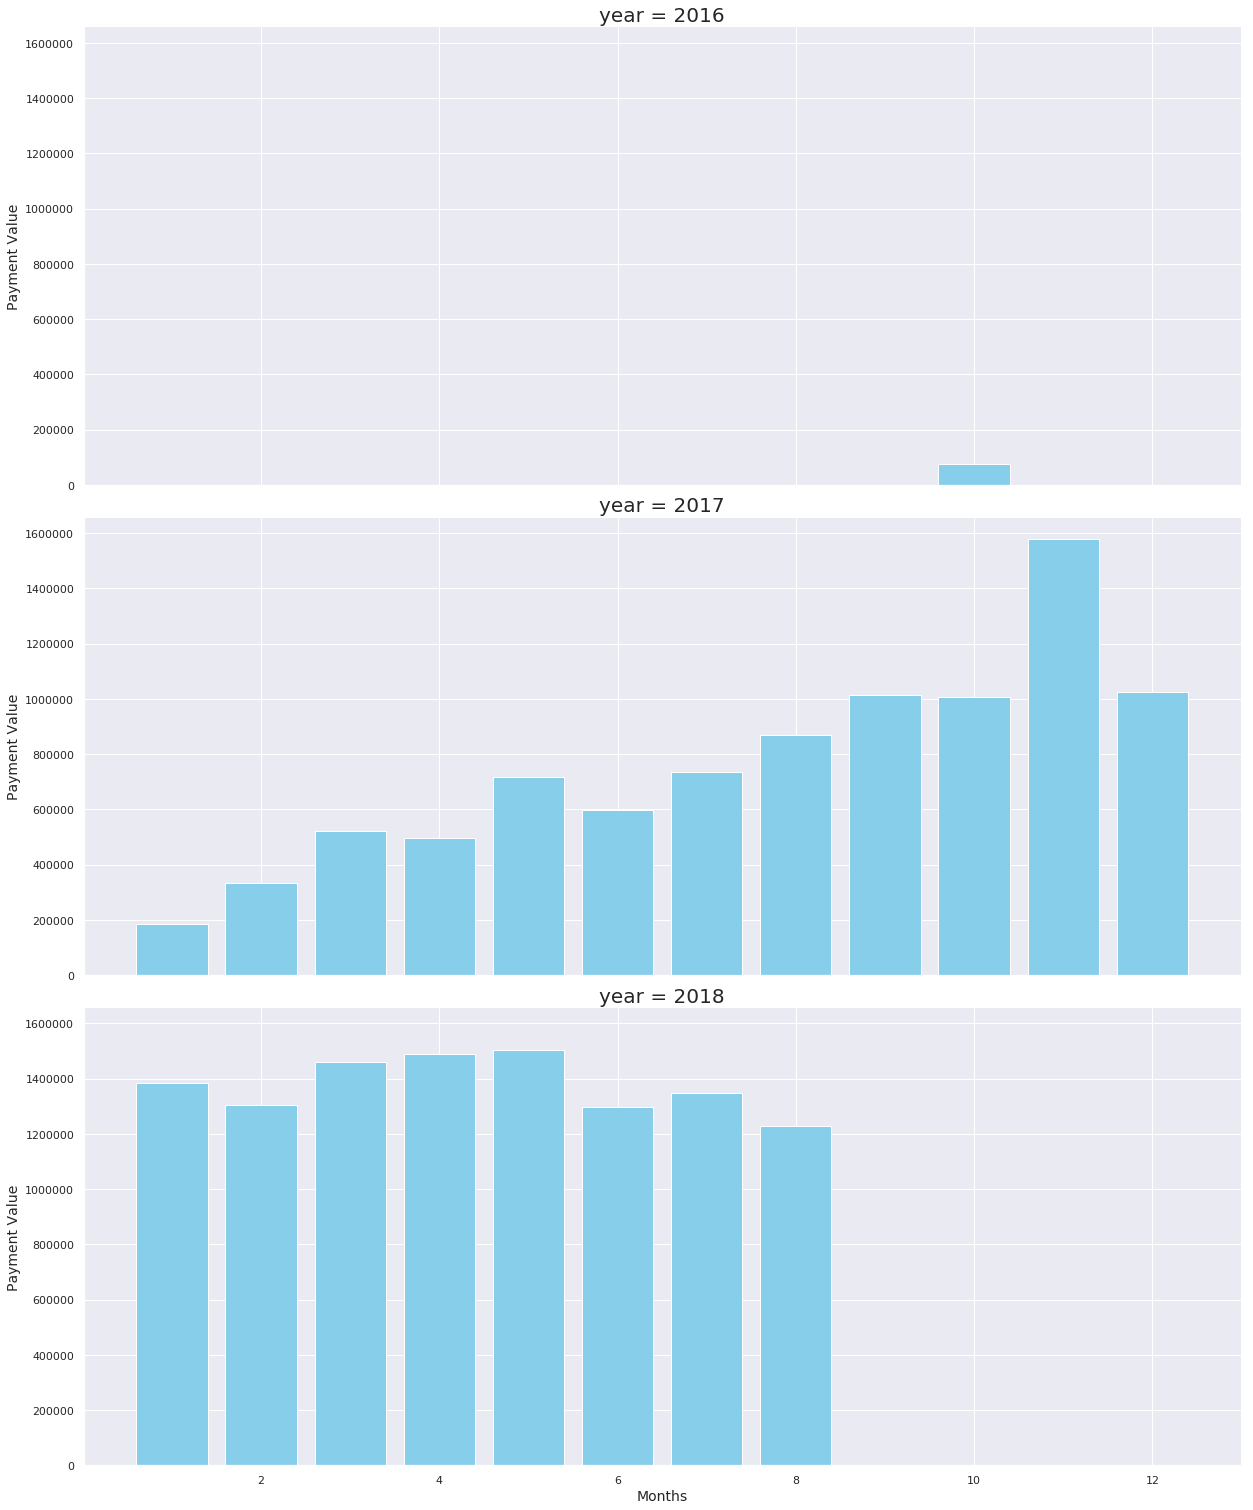

In [76]:
g = sns.FacetGrid(data=multivariable_plot_df, row = 'year', height=7, aspect=2.5, sharey=True)

g = g.map(plt.bar, 'month', 'payment_value', color='skyblue')
g.set_titles( size=20);
g.set_ylabels('Payment Value'.title(), size=14);
g.set_xlabels('months'.title(), size=14);



# Machine Learning Applications
* Clustering customers based on customers data
* Customer Life Time Value prediction

## Clustering Customers Based On Review Rating and Purchase Power 
## (Unsupervised Learning)

In [77]:
clustering_customers_df = master_df_with_product_categories[['customer_unique_id','customer_id','payment_value','review_score']]\
.groupby('customer_unique_id').agg({'payment_value': 'sum', 'review_score': 'mean', 'customer_id':'count'}).reset_index()

In [78]:
clustering_customers_df.describe()

,payment_value,review_score,customer_id
count,94094.000000,94094.000000,94094.000000
mean,214.260035,4.089008,1.239091
std,647.342304,1.336968,0.850587
min,9.590000,1.000000,1.000000
25%,64.000000,4.000000,1.000000
50%,113.150000,5.000000,1.000000
75%,203.770000,5.000000,1.000000
max,109312.640000,5.000000,75.000000


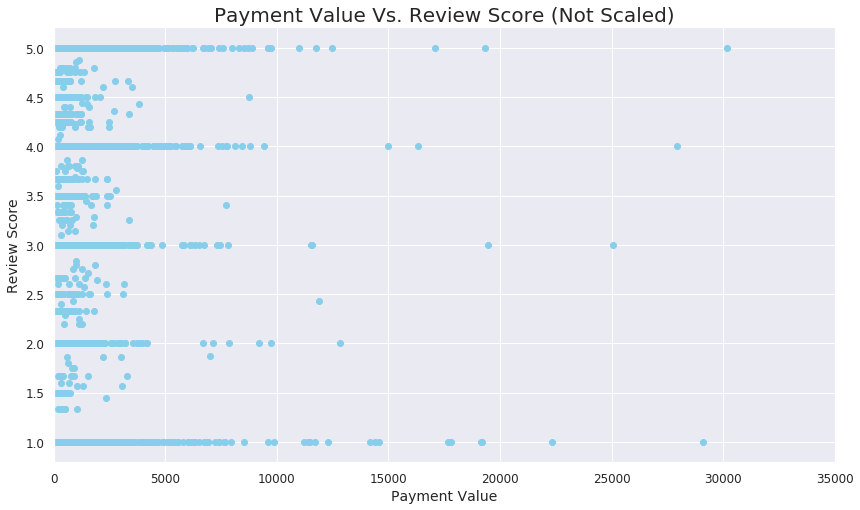

In [79]:
# lets check the scatter
plt.figure(figsize=(14,8));

plt.scatter( clustering_customers_df.payment_value, clustering_customers_df.review_score, color='skyblue');
plt.xlim(0,35000);


plt.title('Payment value vs. review score (Not Scaled)'.title(), fontsize=20);
plt.ylabel('review score'.title(), fontsize=14);
plt.xlabel('Payment value'.title(), fontsize=14);

plt.xticks(rotation=0, fontsize= 12);
plt.yticks(fontsize=12)
plt.show()

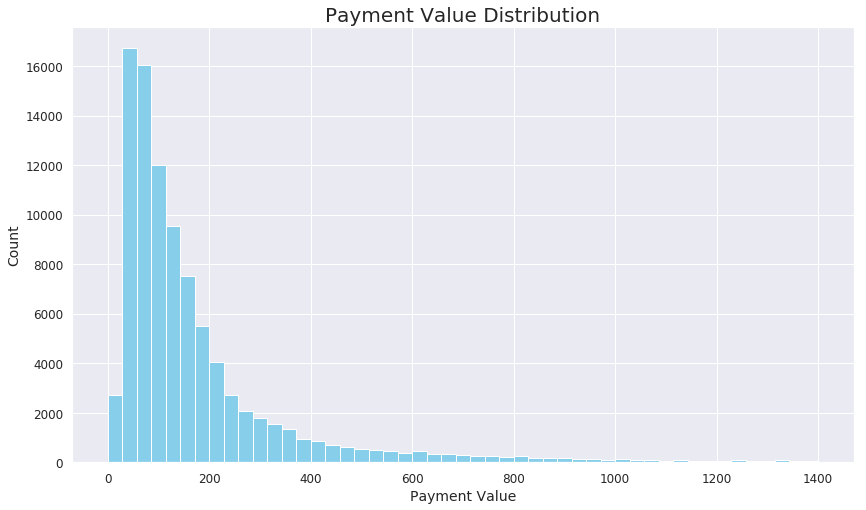

In [80]:
plt.figure(figsize=(14,8))

bins= np.linspace(start=0, stop=1400, num=50)
plt.hist(x=np.asarray(clustering_customers_df.payment_value), bins=bins, color='skyblue');

plt.title('Payment value distribution'.title(), fontsize=20);
plt.ylabel('count'.title(), fontsize=14);
plt.xlabel('Payment value'.title(), fontsize=14);

plt.xticks(rotation=0, fontsize= 12);
plt.yticks(fontsize=12)
plt.show()

In [81]:
clustering_customers_df.payment_value.describe()

count     94094.000000
mean        214.260035
std         647.342304
min           9.590000
25%          64.000000
50%         113.150000
75%         203.770000
max      109312.640000
Name: payment_value, dtype: float64

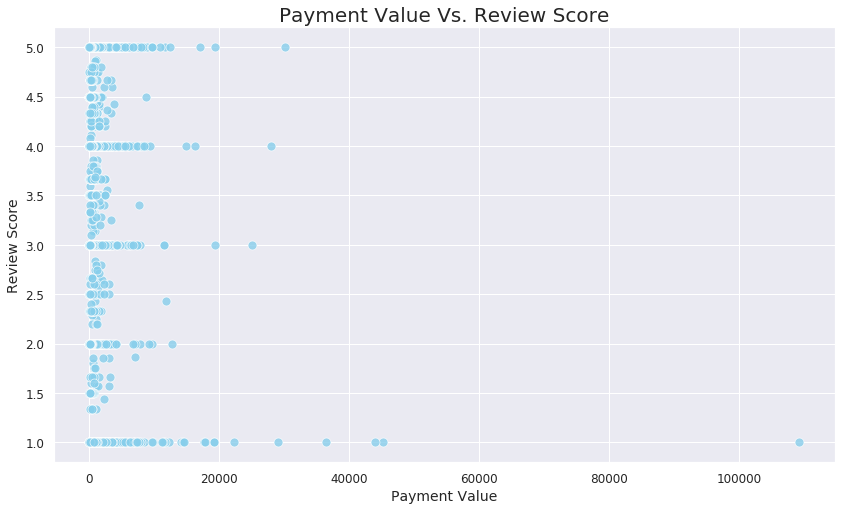

In [82]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=clustering_customers_df.payment_value, y=clustering_customers_df.review_score, alpha=0.8,\
                x_jitter=0.5, y_jitter=0.5, s=80, data=clustering_customers_df, color='skyblue');

plt.title('Payment Value vs. Review Score'.title(), fontsize=20);
plt.ylabel('review score'.title(), fontsize=14);
plt.xlabel('Payment value'.title(), fontsize=14);

plt.xticks(rotation=0, fontsize= 12);
plt.yticks(fontsize=12)
plt.show()

In [83]:
scaler = StandardScaler()

In [84]:
scaler.fit(clustering_customers_df[['payment_value', 'review_score']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [85]:
clustering_customers_df['scaled_payment_value'] = scaler.transform(clustering_customers_df[['payment_value', 'review_score']])[:,0]

In [86]:
clustering_customers_df['scaled_review_score'] = scaler.transform(clustering_customers_df[['payment_value', 'review_score']])[:,1]

In [87]:
clustering_customers_df[['scaled_payment_value','scaled_review_score']]

,scaled_payment_value,scaled_review_score
0,-0.111781,0.681391
1,-0.288983,-0.066575
2,-0.197794,-0.814540
3,-0.263602,-0.066575
4,-0.026833,0.681391
...,...,...
94089,6.056457,0.681391
94090,-0.200328,-0.066575
94091,-0.157259,0.681391
94092,-0.124463,0.681391


In [88]:
# KMeans
kmeans = KMeans(4)
kmeans.fit(clustering_customers_df[['scaled_payment_value','scaled_review_score']])
clusters = clustering_customers_df[['scaled_payment_value','scaled_review_score']].copy()
clustering_customers_df['cluster_pred'] = kmeans.fit_predict(clusters)

In [89]:
clustering_customers_df[['scaled_payment_value','scaled_review_score']].describe()

,scaled_payment_value,scaled_review_score
count,9.409400e+04,9.409400e+04
mean,1.369195e-17,5.059683e-17
std,1.000005e+00,1.000005e+00
min,-3.161714e-01,-2.310470e+00
25%,-2.321196e-01,-6.657451e-02
50%,-1.561934e-01,6.813906e-01
75%,-1.620486e-02,6.813906e-01
max,1.685336e+02,6.813906e-01


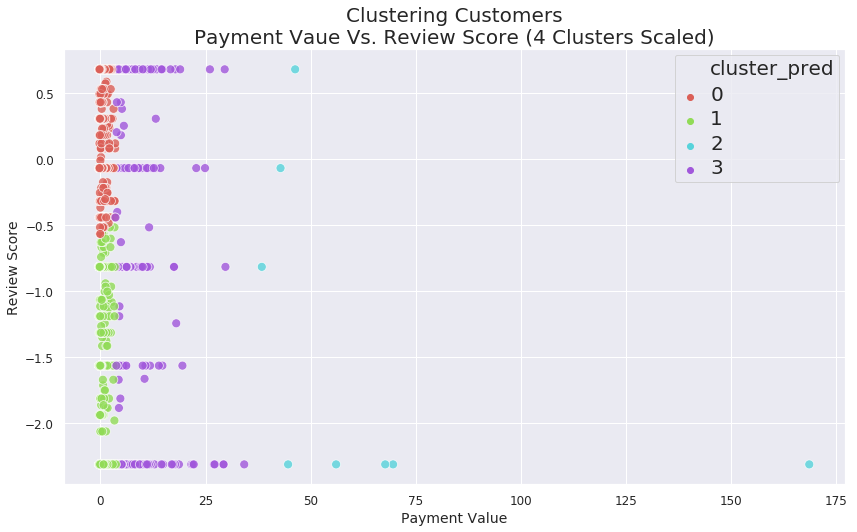

In [90]:
plt.figure(figsize=(14,8))
ax = sns.scatterplot(x='scaled_payment_value', y='scaled_review_score', alpha=0.8,\
                x_jitter=0.5, y_jitter=0.5, hue='cluster_pred', data=clustering_customers_df,\
               s=80, palette=sns.color_palette("hls", 4));


plt.setp(ax.get_legend().get_title(), fontsize='25')
plt.setp(ax.get_legend().get_texts(), fontsize='20')
plt.title('Clustering Customers'+'\n'+'Payment vaue vs. review score (4 clusters scaled)'.title(), fontsize=20);
plt.ylabel('review score'.title(), fontsize=14);
plt.xlabel('Payment value'.title(), fontsize=14);

plt.xticks(rotation=0, fontsize= 12);
plt.yticks(fontsize=12)
plt.show()

## Implementing the Elbow Method to choose the number of clusters

In [91]:
# The Elbow method is mainly about plotting the Within Cluster Standard Error (WCSS) vs the Number of Clusters used.
# And we will be checking for a number of clusters that forms an elbow shape, meaning that the slope of our line changes highly when it
# goes into the number of clusters,(Slope_line_before_x_clusters+point != Slope_line_after_x_clusters_point)

wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(clustering_customers_df[['scaled_payment_value','scaled_review_score']])
    wcss.append(kmeans.inertia_)

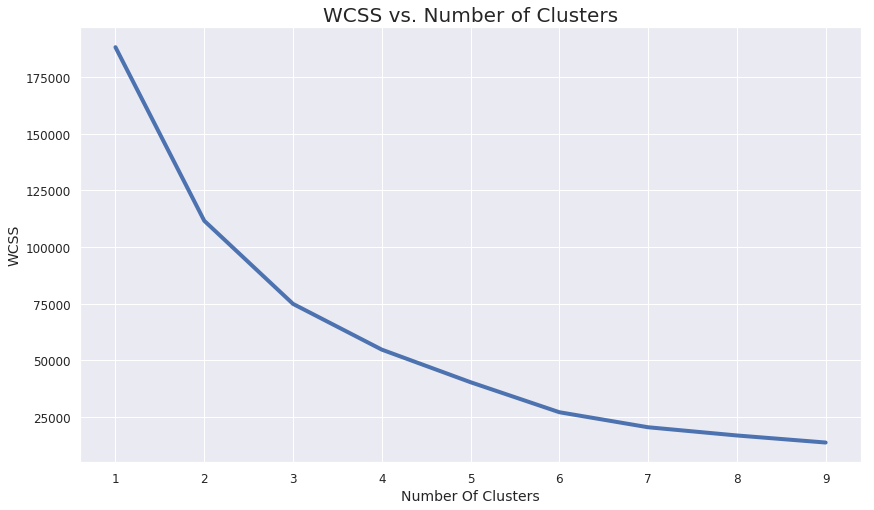

In [92]:
# 3 seems to have a good change in wcss, we will try it.
plt.figure(figsize=(14,8))

plt.plot(range(1,10), wcss, linewidth=4);
plt.xlabel('Number of clusters'.title())
plt.ylabel('wcss'.title())

plt.title('WCSS vs. Number of Clusters', fontsize=20);
plt.ylabel('WCSS', fontsize=14);
plt.xlabel('Number of Clusters'.title(), fontsize=14);

plt.xticks(rotation=0, fontsize= 12);
plt.yticks(fontsize=12)
plt.show()

In [93]:
kmeans_new = KMeans(3)
kmeans_new.fit(clustering_customers_df[['scaled_payment_value','scaled_review_score']])
clustering_customers_df['clusters_new_3'] = kmeans_new.fit_predict(clustering_customers_df[['scaled_payment_value','scaled_review_score']])
clustering_customers_df

,customer_unique_id,payment_value,review_score,customer_id,scaled_payment_value,scaled_review_score,cluster_pred,clusters_new_3
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,5.0,1,-0.111781,0.681391,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,4.0,1,-0.288983,-0.066575,0,0
2,0000f46a3911fa3c0805444483337064,86.22,3.0,1,-0.197794,-0.814540,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,4.0,1,-0.263602,-0.066575,0,0
4,0004aac84e0df4da2b147fca70cf8255,196.89,5.0,1,-0.026833,0.681391,0,0
...,...,...,...,...,...,...,...,...
94089,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84,5.0,2,6.056457,0.681391,3,0
94090,fffea47cd6d3cc0a88bd621562a9d061,84.58,4.0,1,-0.200328,-0.066575,0,0
94091,ffff371b4d645b6ecea244b27531430a,112.46,5.0,1,-0.157259,0.681391,0,0
94092,ffff5962728ec6157033ef9805bacc48,133.69,5.0,1,-0.124463,0.681391,0,0


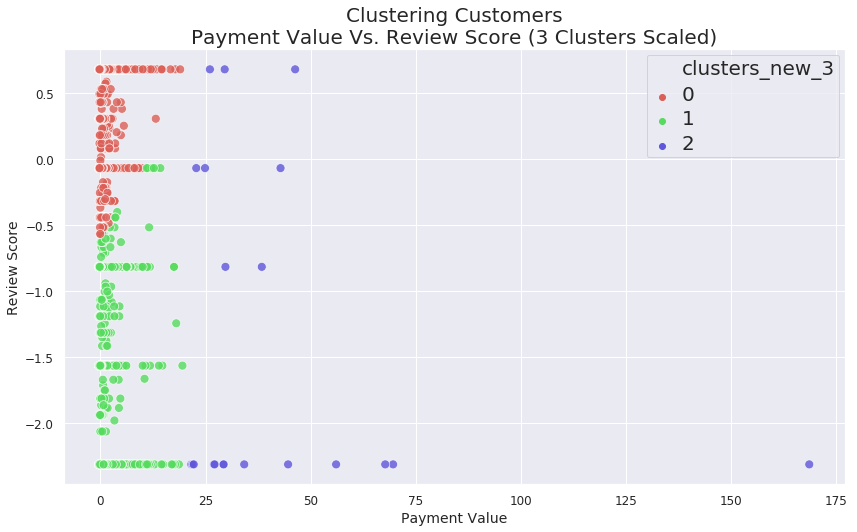

In [94]:
plt.figure(figsize=(14,8))
ax= sns.scatterplot(x='scaled_payment_value', y='scaled_review_score', alpha=0.8,\
                x_jitter=0.5, y_jitter=0.5, hue='clusters_new_3', data=clustering_customers_df,\
               s=80, palette=sns.color_palette("hls", 3));


plt.setp(ax.get_legend().get_title(), fontsize='25')
plt.setp(ax.get_legend().get_texts(), fontsize='20')
plt.title('Clustering Customers'+'\n'+'Payment value vs. review score (3 clusters scaled)'.title(), fontsize=20);
plt.ylabel('review score'.title(), fontsize=14);
plt.xlabel('Payment value'.title(), fontsize=14);

plt.xticks(rotation=0, fontsize= 12);
plt.yticks(fontsize=12)
plt.show()

In [95]:
# from a business point of view I believe the last cluster seem to be a group of outliers,
#they have alot of purchase power, some of them are satistfied some are not, if we isolate this group, it is better to use 5 
# clusters is order to have the for typical clusters: Fans, supporters, Roamers, Alienated, in addition to our case, the group of outliers, a strategy could be
# the following:
# 1. Fans should be awarded in order to increase our sales.
# 2. For supporters we should increase our customer experience for them to increase their review score

kmeans_new_5 = KMeans(5)
kmeans_new_5.fit(clustering_customers_df[['scaled_payment_value','scaled_review_score']])
clustering_customers_df['clusters_new_5'] = kmeans_new_5.fit_predict(clustering_customers_df[['scaled_payment_value','scaled_review_score']])
clustering_customers_df

,customer_unique_id,payment_value,review_score,customer_id,scaled_payment_value,scaled_review_score,cluster_pred,clusters_new_3,clusters_new_5
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,5.0,1,-0.111781,0.681391,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,4.0,1,-0.288983,-0.066575,0,0,0
2,0000f46a3911fa3c0805444483337064,86.22,3.0,1,-0.197794,-0.814540,1,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,4.0,1,-0.263602,-0.066575,0,0,0
4,0004aac84e0df4da2b147fca70cf8255,196.89,5.0,1,-0.026833,0.681391,0,0,0
...,...,...,...,...,...,...,...,...,...
94089,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84,5.0,2,6.056457,0.681391,3,0,4
94090,fffea47cd6d3cc0a88bd621562a9d061,84.58,4.0,1,-0.200328,-0.066575,0,0,0
94091,ffff371b4d645b6ecea244b27531430a,112.46,5.0,1,-0.157259,0.681391,0,0,0
94092,ffff5962728ec6157033ef9805bacc48,133.69,5.0,1,-0.124463,0.681391,0,0,0


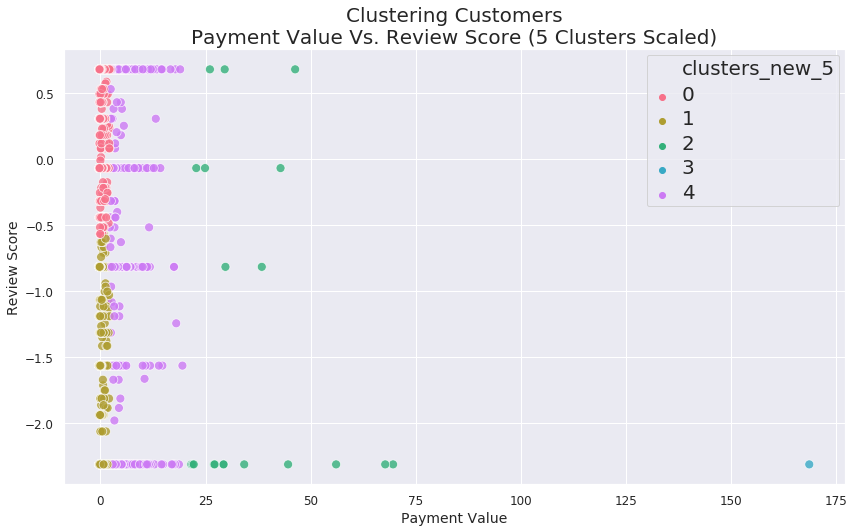

In [96]:
# as we see no real added value happened to our clustering of 5, which validate the Elbow method, since on the graph we do not see
# any real change in the WCSS with the increase of number of clusters.

plt.figure(figsize=(14,8))

ax = sns.scatterplot(x='scaled_payment_value', y='scaled_review_score', alpha=0.8,\
                x_jitter=0.5, y_jitter=0.5, hue='clusters_new_5', data=clustering_customers_df,\
               s=80, palette=sns.color_palette("husl", 5));


plt.setp(ax.get_legend().get_title(), fontsize='25')
plt.setp(ax.get_legend().get_texts(), fontsize='20')
plt.title('Clustering Customers'+'\n'+'Payment value vs. review score (5 clusters scaled)'.title(), fontsize=20);
plt.ylabel('review score'.title(), fontsize=14);
plt.xlabel('Payment value'.title(), fontsize=14);

plt.xticks(rotation=0, fontsize= 12);
plt.yticks(fontsize=12)
plt.show()